In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def compute_len(data):
    len_all = []
    for entry in data:
        tmp_len = len(entry)
        len_all.append(tmp_len)
    return len_all

def plot_histogram(data, bin_step, name):
    # Create the histogram
    max_val = max(data)
    min_val = min(data)
    if min_val >= 100:
        min_val = 100
    else:
        min_val = 0
    bin_edges = list(range(min_val, max_val + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(180/255, 211/255, 178/255), edgecolor='black', alpha=0.99, rwidth=0.87)    
    #print(n)
    #print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Sequence Length Ranges')
    plt.xlabel('Sequence Length')
    plt.ylabel('Number of Instances')
    # plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

In [2]:
'''    
def lysozyme_to_fasta(sequences, file_name="output.fasta"):
    with open(file_name, 'w') as file:
        for seq in sequences:
            # Extracting accession identifier and sequence
            accession = seq['sequence']['metadata']['accession']
            sequence = seq['sequence']['metadata']['sequence']
            # Writing the header with accession identifier
            file.write(f">{accession}\n")
            # Writing the amino acid sequence
            file.write(f"{sequence}\n")
     
lysozyme_data_file = os.path.join("data/filtered_data_PF00959.p") 
# Reload predicted_data from the .p file
lysozyme_data = False
with open(lysozyme_data_file, "rb") as file:
    lysozyme_data = pickle.load(file)

print(type(lysozyme_data))
print(lysozyme_data[0])

lysozyme_to_fasta(lysozyme_data, file_name="lysozymes_db.fasta")'''

'    \ndef lysozyme_to_fasta(sequences, file_name="output.fasta"):\n    with open(file_name, \'w\') as file:\n        for seq in sequences:\n            # Extracting accession identifier and sequence\n            accession = seq[\'sequence\'][\'metadata\'][\'accession\']\n            sequence = seq[\'sequence\'][\'metadata\'][\'sequence\']\n            # Writing the header with accession identifier\n            file.write(f">{accession}\n")\n            # Writing the amino acid sequence\n            file.write(f"{sequence}\n")\n     \nlysozyme_data_file = os.path.join("data/filtered_data_PF00959.p") \n# Reload predicted_data from the .p file\nlysozyme_data = False\nwith open(lysozyme_data_file, "rb") as file:\n    lysozyme_data = pickle.load(file)\n\nprint(type(lysozyme_data))\nprint(lysozyme_data[0])\n\nlysozyme_to_fasta(lysozyme_data, file_name="lysozymes_db.fasta")'

In [31]:
import os
def read_fasta(file_path):
    """
    Reads a FASTA file with a single protein sequence.
    Args:
    file_path (str): The path to the FASTA file.
    Returns:
    tuple: A tuple containing the identifier and the protein sequence as strings.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
        identifier = lines[0].strip()[4:21]  # Remove '>' and any trailing newline character
        sequence = ''.join(line.strip() for line in lines[1:])  # Concatenate the remaining lines
        return identifier, sequence
sequences_and_identifiers = []
fasta_dir = 'FASTA_lysozymes_of_interest/'
for file in os.listdir(fasta_dir):
    sequences_and_identifiers.append((read_fasta(fasta_dir + file)))

P03706 = sequences_and_identifiers[1]
print(P03706)
P03706 = P03706[1]
original = P03706
original_id = 'P03706'
protein_base = 0.5
'''
Q37875 = sequences_and_identifiers[0]
print(Q37875)
Q37875 = Q37875[1]
print(Q37875)
protein_base = 0.5
offset = int(protein_base * len(Q37875))
# Adjust for zero-based indexing
offset = offset - 1 if offset > 0 else 0
print('only offset: ', Q37875[:offset])
original = Q37875
original_id = 'Q37875'



P78285 = sequences_and_identifiers[2]
print(P78285)
P78285 = P78285[1]
original = P78285
original_id = 'P78285'
protein_base = 0.5


P00720 = sequences_and_identifiers[3]
print(P00720)
P00720 = P00720[1]
original = P00720
original_id = 'P00720'
protein_base = 0.5
offset = int(protein_base * len(P00720))
# Adjust for zero-based indexing
offset = offset - 1 if offset > 0 else 0
print('only offset: ', P00720[:offset])
print(len(P00720))
'''

('P03706|ENLYS_LAMB', 'MVEINNQRKAFLDMLAWSEGTDNGRQKTRNHGYDVIVGGELFTDYSDHPRKLVTLNPKLKSTGAGRYQLLSRWWDAYRKQLGLKDFSPKSQDAVALQQIKERGALPMIDRGDIRQAIDRCSNIWASLPGAGYGQFEHKADSLIAKFKEAGGTVREIDV')


"\nQ37875 = sequences_and_identifiers[0]\nprint(Q37875)\nQ37875 = Q37875[1]\nprint(Q37875)\nprotein_base = 0.5\noffset = int(protein_base * len(Q37875))\n# Adjust for zero-based indexing\noffset = offset - 1 if offset > 0 else 0\nprint('only offset: ', Q37875[:offset])\noriginal = Q37875\noriginal_id = 'Q37875'\n\n\n\nP78285 = sequences_and_identifiers[2]\nprint(P78285)\nP78285 = P78285[1]\noriginal = P78285\noriginal_id = 'P78285'\nprotein_base = 0.5\n\n\nP00720 = sequences_and_identifiers[3]\nprint(P00720)\nP00720 = P00720[1]\noriginal = P00720\noriginal_id = 'P00720'\nprotein_base = 0.5\noffset = int(protein_base * len(P00720))\n# Adjust for zero-based indexing\noffset = offset - 1 if offset > 0 else 0\nprint('only offset: ', P00720[:offset])\nprint(len(P00720))\n"

In [27]:
import pickle
import os
# FOR SPECIFIC LYSOZYMES:
# paths to the saved .p files 
data_dir = "Generation_PF00959_model_lr_00001_phage_specific/"

# FOR ONLY KEY GENERATION
#data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned/predicted_stopped/"
#data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned_due/predicted_stopped/"
#original_id = 'p'
#predicted_data_file = os.path.join(data_dir, "") 
#predicted_stopped_file = os.path.join(data_dir, "predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.75seed_percentage_0.5.p") 
#predicted_data_file = os.path.join(data_dir, "predicted_data_p0.50_p1.2_t_0.9.p") 


# Reload predicted_data from the .p file
#predicted_data = False
#with open(predicted_data_file, "rb") as file:
#    predicted_data = pickle.load(file)

# Reload predicted_data stopped from the .p file
#predicted_stopped_data = False
#with open(predicted_stopped_file, "rb") as file:
#    predicted_stopped_data = pickle.load(file)
print(os.listdir(data_dir))

['predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.75.p', 'predicted_stopped_data_P78285|LYSD_ECOLI_top_p_0.75seed_percentage_0.25.p', 'predicted_stopped_data_P78285|LYSD_ECOLI_top_p_0.5seed_percentage_0.5.p', 'predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.25seed_percentage_0.25.p', 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.5seed_percentage_0.25.p', 'predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.25.p', 'predicted_stopped_data_P78285|LYSD_ECOLI_top_p_0.25seed_percentage_0.5.p', 'predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.25seed_percentage_0.75.p', 'predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.75seed_percentage_0.5.p', 'predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.25seed_percentage_0.5.p', 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.25seed_percentage_0.75.p', 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.75seed_percentage_0.75.p', 'predicted_stopped_data_P00720|ENLYS_BPT4_top_p_0.25seed_percentage_0.25.p', 'pre

In [24]:
def filter_data_for_duplicates(predicted_stopped_data, original):
    filtered_stopped_data = []
    original_count = 0
    for seq in predicted_stopped_data:
        if seq == original:
            original_count += 1
        elif seq not in filtered_stopped_data:
            filtered_stopped_data.append(seq)
    print('original_sequence_count', original_count)
    print('original length: ', len(original))
    print('stopped_generated_sequences_number: ', len(predicted_stopped_data))
    print('filtered sequences_number: ', len(filtered_stopped_data))
    print('duplicates: ', len(predicted_stopped_data) - len(filtered_stopped_data))
    #
    if len(filtered_stopped_data) < 10:
        raise ZeroDivisionError
    # average sequence length calculation
    add = 0
    for i in predicted_stopped_data:
        add += len(i)
    add /=len(predicted_stopped_data)
    print('average len calculation of generated stopped: ', add)
    
    mean = sum(len(i) for i in filtered_stopped_data) / len(filtered_stopped_data)
    # Calculate the variance
    variance = sum((len(i) - mean) ** 2 for i in filtered_stopped_data) / len(filtered_stopped_data)
    # Calculate the standard deviation (square root of variance)
    std_deviation = variance ** 0.5
    print('average len calculation of filtered generated stopped: ', mean)
    print('std calculation of filtered generated stopped: ', std_deviation)

    print('----------------------histograms----------------------')
    len_data = compute_len(predicted_stopped_data)
    plot_histogram(len_data, 100, 'PF_generation1')
    
    len_data = compute_len(filtered_stopped_data)
    plot_histogram(len_data, 100, 'PF_generation1_filtered')
    
    return filtered_stopped_data

#original = Q37875
#filtered_stopped_data = filter_data_for_duplicates(predicted_stopped_data, original)


In [32]:
predicted_stopped_dictionary = {}
for filename in os.listdir(data_dir):
    if 'predicted_stopped_data' in filename:
        if original_id in filename:
            predicted_stopped_data = False
            predicted_stopped_file = data_dir + filename
            with open(predicted_stopped_file, "rb") as file:
                predicted_stopped_data = pickle.load(file)
            print(filename)
            try: 
                filtered_stopped_data = filter_data_for_duplicates(predicted_stopped_data, original)
                predicted_stopped_dictionary[filename] = filtered_stopped_data
            except ZeroDivisionError:
                print('-----sequences detected less than 10-----')
            #vanno ancora tolti gli amminoacidi seed sequence based on seed percentage in keyname in dictionary

predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.75.p
original_sequence_count 150
original length:  158
stopped_generated_sequences_number:  150
filtered sequences_number:  0
duplicates:  150
-----sequences detected less than 10-----
predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.25.p
original_sequence_count 0
original length:  158
stopped_generated_sequences_number:  150
filtered sequences_number:  1
duplicates:  149
-----sequences detected less than 10-----
predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.25seed_percentage_0.5.p
original_sequence_count 150
original length:  158
stopped_generated_sequences_number:  300
filtered sequences_number:  1
duplicates:  299
-----sequences detected less than 10-----
predicted_stopped_data_P03706|ENLYS_LAMB_top_p_0.75seed_percentage_0.5.p
original_sequence_count 150
original length:  158
stopped_generated_sequences_number:  150
filtered sequences_number:  0
duplicates:  150
-----sequences detected less t

In [9]:
# we have a list of amino acid sequences, function to transform it into a FASTA format file
def list_to_fasta(sequences, file_name, original_yes, after_percentage):
    with open(file_name, 'w') as file:
        unique_sequences = []
        count = 0
        if original_yes:
            file.write(f">Original\n")
            file.write(f"{original}\n")
        unique_sequences.append(original)
        for idx, sequence in enumerate(sequences):
            if sequence not in unique_sequences:
                offset = int(len(sequence)*after_percentage)
                #print(offset)
                #print(len(sequence))
                unique_sequences.append(sequence)
                sequence = sequence[offset:]
                # Writing the header for each sequence
                file.write(f">Sequence_{idx + 1}\n")
                # Writing the amino acid sequence
                file.write(f"{sequence}\n")
            else:
                count += 1
        print('duplicates check ', count)
        print('uniques: ', len(unique_sequences))

#list_to_fasta(predicted_stopped_data, file_name="predicted_stopped_075.fasta")
# list_to_fasta(filtered_stopped_data, file_name="fasta_generated/predicted_stopped_Q37875_topp_075_seed_050_cutted.fasta")

In [14]:
for file in predicted_stopped_dictionary:
    file_fasta = file[:-2] + ".fasta"
    index_of_percentage = file.rfind('_') + 1
    after_percentage = float(file[index_of_percentage:-2])
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, False, after_percentage)

    # with original
    file_fasta = file[:-2] + '_with_original' + ".fasta"
    index_of_percentage = file.rfind('_') + 1
    after_percentage = float(file[index_of_percentage:-2])
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, True, after_percentage)

duplicates check  0
uniques:  3899
duplicates check  0
uniques:  3899


In [18]:
#FOR only key generation
'''
for file in predicted_stopped_dictionary:
    file_fasta = file[:-2] + ".fasta"
    after_percentage = 0
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, False, after_percentage)
'''

duplicates check  0
uniques:  2754


<h3> blast was performed on the stopped databases. i have tabular data with max id hit for each sequence </h3>

In [83]:
import matplotlib.pyplot as plt
def plot_histogram(data, bin_step, name):
    # Create the histogram
    min_data = min(data)
    print('min(data): ', min(data))
    j = 0
    while min_data > (j+10):
        j += 10
    bin_edges = list(range(j, 100 + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(125/255, 180/255, 232/255), edgecolor=(68/255, 127/255, 176/255), alpha=0.99, rwidth=0.87)    
    print(n)
    print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Max-ID Ranges')
    plt.xlabel('ID-percentage range')
    plt.ylabel('Number of Instances')
    plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

In [86]:
import pandas as pd
data_dir = 'fasta_generated/tab_data/'
print(data_dir)
os.listdir(data_dir)

fasta_generated/tab_data/


['LYSO_075onlykey.tabular',
 'SWISS_075_onlykey.tabular',
 'SWISS_050onlykey.tabular',
 'LYSO_050onlykey.tabular']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LYSO_075onlykey.tabular
            #c1          c2       c3   c4  c5  c6  c7   c8  c9  c10  ...  c17  \
0    Sequence_1  A0A1Q8F5C7   95.395  152   7   0   1  152   1  152  ...    0   
1   Sequence_10      V2UY16   90.206  194  19   0   1  194   1  194  ...    0   
2  Sequence_100      V1GWW6  100.000  169   0   0   1  169   1  169  ...    0   

      c18 c19  c20                                                c21  \
0   99.34   1    1  MPRSHCHPQVAAFLDMIAFSEGTRGKGDDGYNKLVNPAGFFESYAT...   
1   93.30   1    1  MKTIFDYLRKISGGKLTQKQVDATDKLINVATAYDVADMLGIAIDS...   
2  100.00   1    1  MNPSIVKRCLVGAVLAIAATLPGFQSLHTSVEGLKLIADYEGCRLQ...   

                                                 c22  c23  c24         c25  rn  
0  MPRSHCHPQVAAFLDMIAYAEGTKGRGDDGYNKLVNPAGFFESYAT...  153  153  A0A1Q8F5C7   1  
1  MKAIIDYLRKISGGKLTQKQVDATDKLINVATAYDVADMLGIAIDS...  212  194      V2UY16   1  
2  MNPSIVKRCLVGAVLAIAATLPGFQSLHTSVEGLKLIADYEGCRLQ...  244  169      V1GWW6   1  

[3 rows x 26 columns]
instances: 

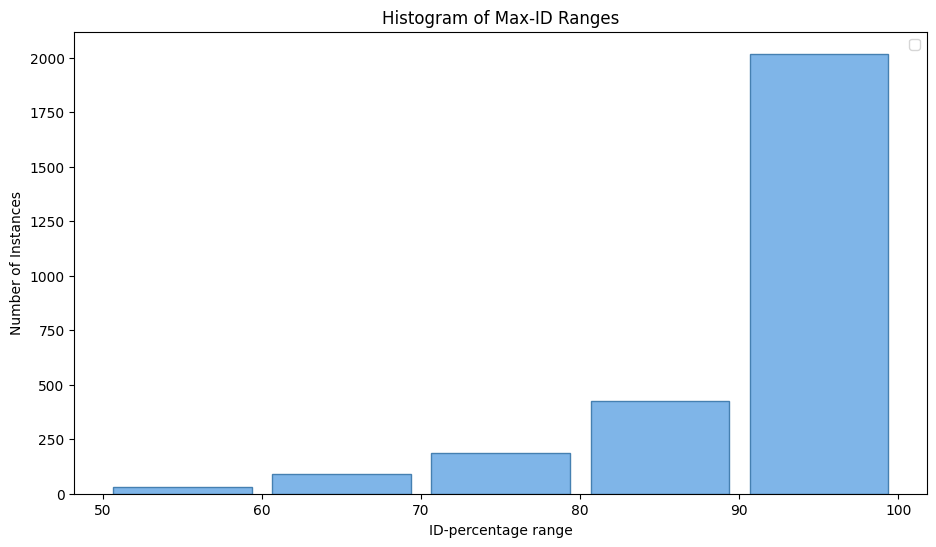

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


SWISS_075_onlykey.tabular
            #c1        c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  c17  \
0    Sequence_1  P03706.1  52.632  152  67   2   5  152   3  153  ...    5   
1   Sequence_10  Q37896.1  44.667  150  71   3  48  192   1  143  ...   12   
2  Sequence_100  Q6XQ98.1  41.007  139  75   2  36  167  22  160  ...    7   

     c18 c19  c20                                                c21  \
0  65.79   1    1  HCHPQVAAFLDMIAFSEGT----RGKGDDGYNKLVNPAGFFESYAT...   
1  65.33   1    1  MSVSSVGIQLITSFEDLKLNAYD--DGVGVWTIGYG---TTVYPNG...   
2  58.27   1    1  LIADYEGCRLQPYQCSAGVWTDGIGNTS-GVVPGKTITERQAAQGL...   

                                                 c22  c23  c24  \
0  EINNQRKAFLDMLAWSEGTDNGRQKTRNHGYDVIVG-GELFTDYSD...  153  158   
1  MNISQAGINLIKSFEGLRTKAYKAVPTEKYYTIGYGHYGSDVHPCQ...  212  263   
2  LLERIEGIEYEVYYDIAGVPTVCSGITGPDVIPGKKYTKRECDALL...  244  162   

                                                 c25  rn  
0  RecName: Full=Endolysin; AltName: Full=Lysis 

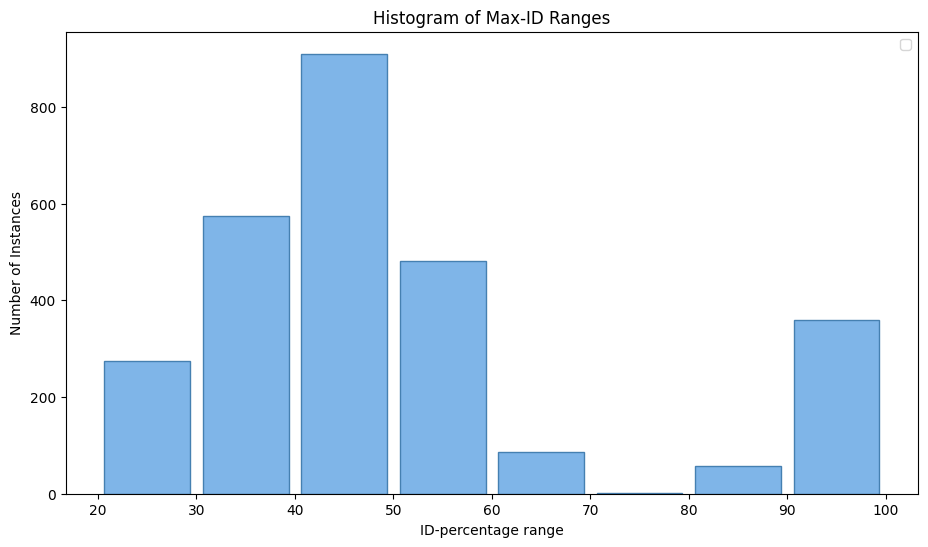

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


SWISS_050onlykey.tabular
            #c1        c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  c17  \
0    Sequence_1  P78285.1  96.364  165   6   0   1  165   1  165  ...    0   
1   Sequence_10  Q9T1T5.1  28.814  118  76   3  19  136   8  117  ...    8   
2  Sequence_100  P68920.1  91.525  177  15   0   1  177   1  177  ...    0   

     c18 c19  c20                                                c21  \
0  98.79   1    1  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...   
1  44.07   1    1  FVGVKNDEGFTSKPVIPVKGDRPTQGHGSTFKPDGSPVKMTDPPIT...   
2  93.22   1    1  MSRKLHYGLSVAVLALIATGASAPEILDQFLDEKEGNHTTAYRDGA...   

                                                 c22  c23  c24  \
0  MPPSLRKAVAAAIGGGAIAIASVLITGPSGNDGLEGVSYIPYKDIV...  165  165   
1  LVLIKRYEGLRLKAY-QCRAGRWTLGYGHTHNLNIGDV------IT...  174  146   
2  MSRKLRYGLSAAVLALIAAGASAPEILDQFLDEKEGNHTTAYRDGA...  179  177   

                                                 c25  rn  
0  RecName: Full=Lysozyme RrrD; AltName: Full=End

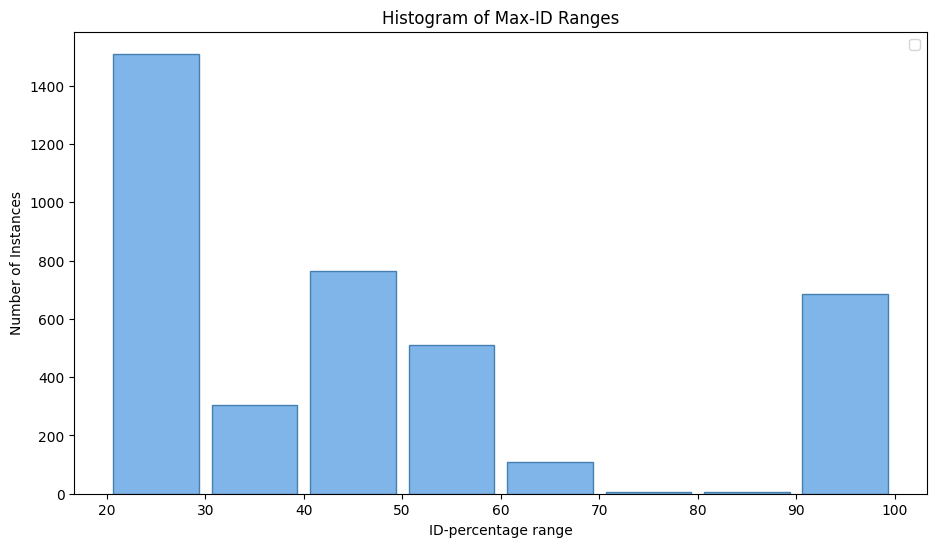

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LYSO_050onlykey.tabular
            #c1          c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  c17  \
0    Sequence_1      I2UNL6  99.394  165   1   0   1  165   1  165  ...    0   
1   Sequence_10  A0A0E1FN67  99.408  169   1   0   1  169   1  169  ...    0   
2  Sequence_100      S1PH48  97.175  177   5   0   1  177   1  177  ...    0   

      c18 c19  c20                                                c21  \
0  100.00   1    1  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...   
1  100.00   1    1  MSNKTKYIAAVLAASAAFFVGVKNDEGFTSKPVIPVKGDRPTQGHG...   
2   99.44   1    1  MSRKLHYGLSVAVLALIATGASAPEILDQFLDEKEGNHTTAYRDGA...   

                                                 c22  c23  c24         c25  rn  
0  MSPSLRKAVAAAIGGGAVAIASVLITGPSGDDGLEGVSYIPYEDIV...  165  165      I2UNL6   1  
1  MSNKTKYIAAVLAASAAFFVGVKNDEGFTSKPVIPVKGDRPTQGHG...  174  169  A0A0E1FN67   1  
2  MSRKLHYGLSVAVLALIATGASAPEILDQFLDEKEGNHTTAYRDGA...  179  177      S1PH48   1  

[3 rows x 26 columns]
instances:  389

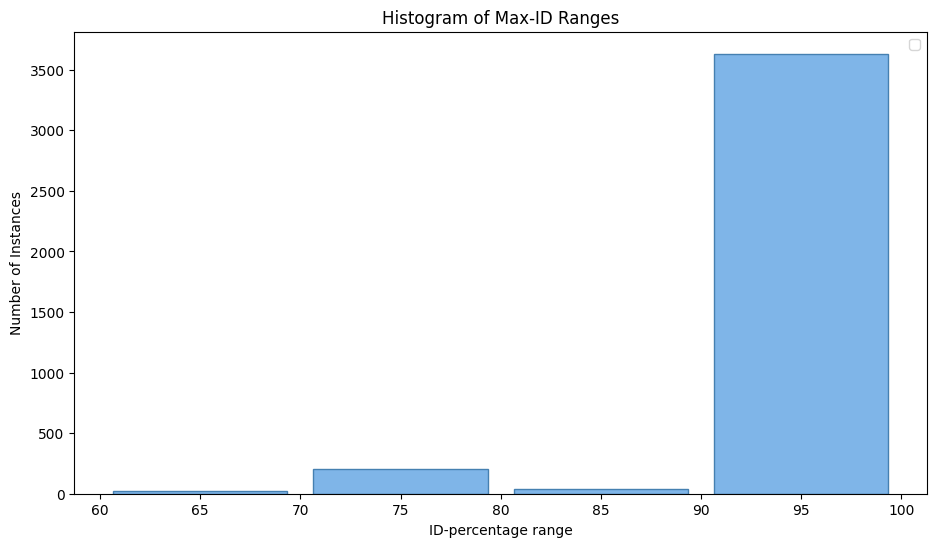

In [88]:
for tab_data in os.listdir(data_dir):
    print(tab_data)
    tab_dir = data_dir + tab_data
    df = pd.read_csv(tab_dir, delimiter='\t')
    print(df.head(3))
    c3_values = df['c3'].tolist()
    print('instances: ', len(c3_values))
    plot_histogram(c3_values, 10, tab_data[:-8] + '_maxID')